In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**DATA UNDERSTANDING**

In [3]:
#unzipping the data file.
! unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/realtor-data.csv   
  inflating: __MACOSX/data/._realtor-data.csv  


In [4]:
# Load and display the first 10 entries from the dataset

df = pd.read_csv('./data/realtor-data.csv')
df.head(10)

brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   
5     103378.0  for_sale  179000.0  4.0   3.0      0.46  1850806.0   
6       1205.0  for_sale   50000.0  3.0   1.0      0.20  1298094.0   
7      50739.0  for_sale   71600.0  3.0   2.0      0.08  1048466.0   
8      81909.0  for_sale  100000.0  2.0   1.0      0.09   734904.0   
9      65672.0  for_sale  300000.0  5.0   3.0      7.46  1946226.0   

            city        state  zip_code  house_size prev_sold_date  
0       Adjuntas  Puerto Rico     601.0       920.0            NaN  
1       Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2     Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3          Ponce  Puerto Rico     731.0      1800.0            NaN  
4       Mayaguez  Puerto Rico     680.0         NaN            NaN  
5  San Sebastian  Puerto Rico     612.0      2520.0            NaN  
6         Ciales  Puerto Rico     639.0      2040.0            NaN  
7          Ponce  Puerto Rico     731.0      1050.0            NaN  
8          Ponce  Puerto Rico     730.0      1092.0            NaN  
9     Las Marias  Puerto Rico     670.0      5403.0            NaN

In [80]:
# Display the shape of the dataset
df.shape

(2226382, 12)

In [81]:
# Show the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [82]:
# Generate descriptive statistics for numerical columns
df.describe()

brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01   
50%    5.288400e+04  3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01   
75%    7.918300e+04  5.500000e+05  4.000000e+00  3.000000e+00  9.800000e-01   
max    1.101420e+05  2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05   

             street      zip_code    house_size  
count  2.215516e+06  2.226083e+06  1.657898e+06  
mean   1.012325e+06  5.218668e+04  2.714471e+03  
std    5.837635e+05  2.895408e+04  8.081635e+05  
min    0.000000e+00  0.000000e+00  4.000000e+00  
25%    5.063128e+05  2.961700e+04  1.300000e+03  
50%    1.012766e+06  4.838200e+04  1.760000e+03  
75%    1.521173e+06  7.807000e+04  2.413000e+03  
max    2.001357e+06  9.999900e+04  1.040400e+09

In [83]:
# Generate descriptive statistics for categorical columns
df.describe(include = 'object')

status     city    state prev_sold_date
count    2226382  2224975  2226374        1492085
unique         3    20098       55          14954
top     for_sale  Houston  Florida     2022-03-31
freq     1389306    23862   249432          17171

**DATA PREPROCESSING**

In [84]:
# Check for duplicate entries
df.duplicated().sum()

0

In [85]:
# Calculate and display the percentage of missing values
total_missing = df.isna().sum()*100/len(df)
print('Missing Value %')
total_missing

Missing Value %


brokered_by        0.203604
status             0.000000
price              0.069215
bed               21.618797
bath              22.986666
acre_lot          14.624130
street             0.488056
city               0.063197
state              0.000359
zip_code           0.013430
house_size        25.533983
prev_sold_date    32.981627
dtype: float64

In [86]:
# Define a list of columns to fill with the mode
columns_to_fill_with_mode = ['bed', 'bath', 'acre_lot', 'house_size']

# Loop through each column and fill missing values with the mode of that column
for column in columns_to_fill_with_mode:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [87]:
# Drop rows with missing values in critical columns
df = df.dropna(subset=['zip_code','city', 'price', 'brokered_by', 'street'])

In [88]:
# Confirm changes to data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2207987 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 219.0+ MB


In [89]:
df.isnull().sum()

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street                 0
city                   0
state                  6
zip_code               0
house_size             0
prev_sold_date    725587
dtype: int64

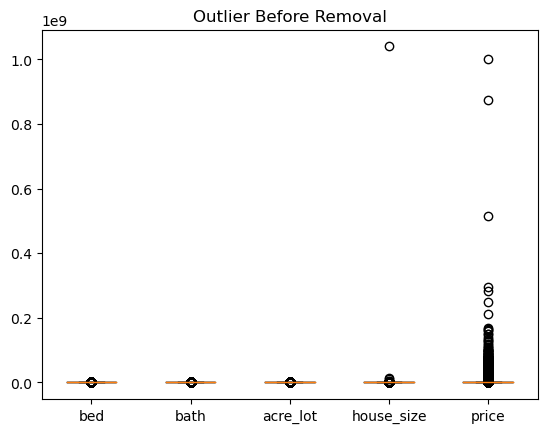

Rows With Outlier: 2207987


In [90]:
numeric_features = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[numeric_features])
plt.xticks([1, 2, 3, 4, 5], numeric_features)
plt.title('Outlier Before Removal')
plt.show()
print(f'Rows With Outlier: {df.shape[0]}')

In [91]:
# Detect and remove outliers using the IQR method
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

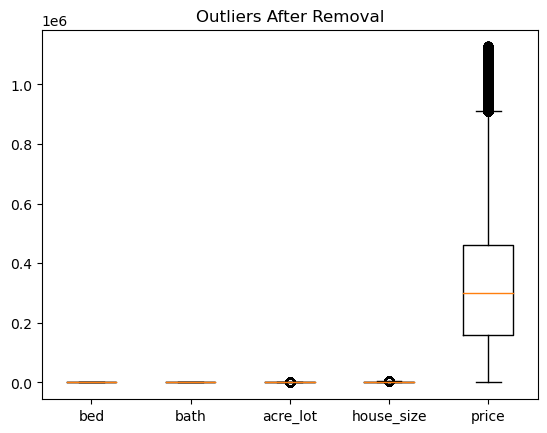

Rows Without Outlier: 1579298


In [92]:
plt.boxplot(df[numeric_features])
plt.xticks([1, 2, 3, 4, 5], numeric_features)
plt.title('Outliers After Removal')
plt.show()
print(f'Rows Without Outlier: {df.shape[0]}')

In [93]:
df.describe()

brokered_by         price           bed          bath      acre_lot  \
count  1.579298e+06  1.579298e+06  1.579298e+06  1.579298e+06  1.579298e+06   
mean   5.316095e+04  3.339806e+05  3.116784e+00  2.225802e+00  2.929249e-01   
std    3.038419e+04  2.318636e+05  7.244748e-01  7.197002e-01  2.736593e-01   
min    0.000000e+00  0.000000e+00  2.000000e+00  1.000000e+00  0.000000e+00   
25%    2.518500e+04  1.599000e+05  3.000000e+00  2.000000e+00  1.500000e-01   
50%    5.296100e+04  2.990000e+05  3.000000e+00  2.000000e+00  1.800000e-01   
75%    7.912800e+04  4.599000e+05  4.000000e+00  3.000000e+00  3.200000e-01   
max    1.101420e+05  1.127350e+06  5.000000e+00  4.000000e+00  1.440000e+00   

             street      zip_code    house_size  
count  1.579298e+06  1.579298e+06  1.579298e+06  
mean   9.804619e+05  5.196330e+04  1.646231e+03  
std    5.678723e+05  2.831510e+04  6.047300e+02  
min    2.000000e+00  6.010000e+02  1.000000e+02  
25%    4.880742e+05  2.991000e+04  1.200000e+03  
50%    9.781590e+05  4.815850e+04  1.462000e+03  
75%    1.470694e+06  7.746900e+04  2.001000e+03  
max    2.001357e+06  9.999900e+04  3.555000e+03

In [94]:
df = df.sample(n=50000, random_state=42)

**EXPLORATORY DATA ANALYSIS**

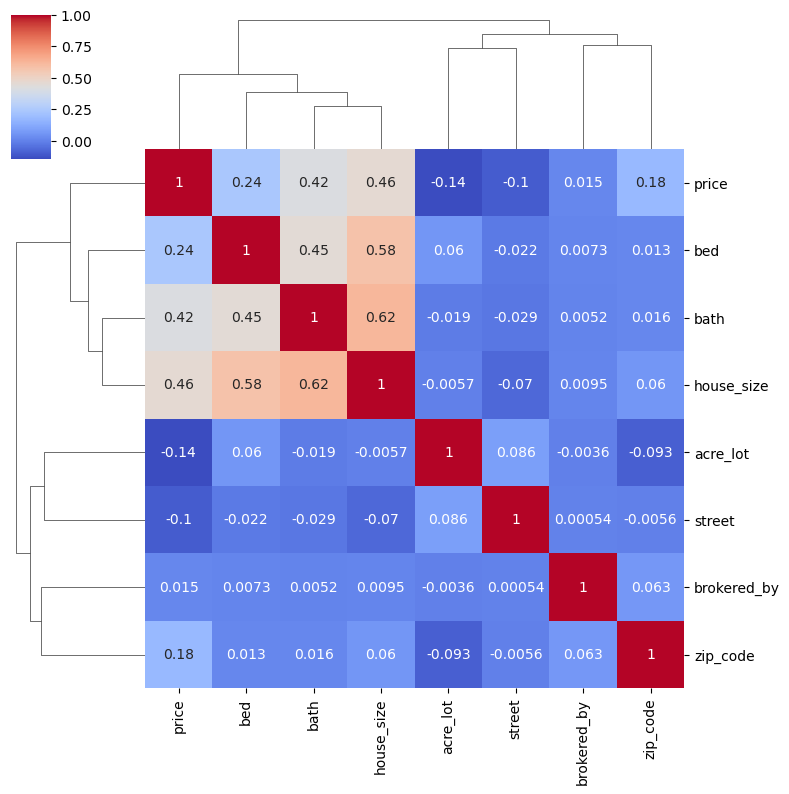

In [95]:
numeric_columns = df.select_dtypes(include=[np.number])

# Correlation and clustermap of numerical features
sns.clustermap(
    numeric_columns.corr(),
    annot=True,
    cmap='coolwarm',
    figsize=(8, 8)
)
plt.show()

**DISTRIBUTION OF PRICE**

In [96]:
# Plotting histograms to understand the distribution of price
fig = px.histogram(df, x="price", nbins=25, template="plotly")
fig.update_layout(title="Distribution of Price")
fig.show()

In [97]:
# Show value counts for price
df['price'].value_counts()

price
350000.0     376
250000.0     373
325000.0     339
275000.0     327
225000.0     322
            ... 
1027412.0      1
416040.0       1
320064.0       1
456064.0       1
395340.0       1
Name: count, Length: 6741, dtype: int64

In [98]:
# Create a histogram of price distribution segmented by bed count
fig = px.histogram(df, x="price", color="bed", nbins=20,
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   labels={"bed": "Number of Bedrooms", "price": "Price"},
                   title="Distribution of Price by Number of Bedrooms")

# Update layout for clarity and better presentation
fig.update_layout(
    title={"text": "Distribution of Price by Number of Bedrooms", "x": 0.5, "xanchor": "center"},
    xaxis_title="Price",
    yaxis_title="Count",
    legend_title="Bedrooms"
)

# Show the plot
fig.show()

In [99]:
# Grouping data and plotting to find trends
df.groupby('bed', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

bed          price
3  5.0  490075.327331
2  4.0  448550.726953
0  2.0  312938.637795
1  3.0  288316.248177

In [100]:
# Create a histogram of price distribution segmented by bathroom count
fig = px.histogram(df, x="price", color="bath", nbins=20,
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   labels={"bath": "Number of Bathrooms", "price": "Price"},
                   title="Distribution of Price by Number of Bathrooms")

# Update layout for clarity and better presentation
fig.update_layout(
    title={"text": "Distribution of Price by Number of Bathrooms", "x": 0.5, "xanchor": "center"},
    xaxis_title="Price",
    yaxis_title="Count",
    legend_title="Bathrooms"
)

# Show the plot
fig.show()

In [101]:
df.groupby('bath', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

bath          price
3   4.0  569500.969427
2   3.0  470062.308492
1   2.0  279962.650003
0   1.0  225338.262541

In [102]:
average_price_by_lot = df.groupby('acre_lot')['price'].mean().reset_index()

# Plot the average price per acre lot using a scatter plot with an ordinary least squares (OLS) trendline
fig = px.scatter(average_price_by_lot, x='acre_lot', y='price', trendline='ols',
                 labels={'acre_lot': 'Acre Lot Size', 'price': 'Average Price'},
                 title='Average Price per Acre Lot')

# Update layout for better presentation
fig.update_layout(
    title={"text": "Average Price per Acre Lot", "x": 0.5, "xanchor": "center"},
    xaxis_title="Acre Lot Size",
    yaxis_title="Average Price",
    xaxis_tickformat=',.2f'
)

# Show the plot
fig.show()

In [103]:
average_price_by_city = df.groupby('city')['price'].mean().reset_index()

top_cities_by_average_price = average_price_by_city.sort_values(by='price', ascending=False).head(10)

fig = px.bar(top_cities_by_average_price, x='city', y='price', color='city',
             labels={'city': 'City', 'price': 'Mean Price'},
             title='Top 10 Cities with the Highest Average Price')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [104]:
df.groupby('city', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

city      price
1909     El Granada  1125000.0
3360     Kure Beach  1125000.0
1288  Coconut Grove  1125000.0
438    Bell Gardens  1100000.0
1690      Dix Hills  1100000.0
...             ...        ...
2278      Franconia      445.0
2904       Hinsdale      445.0
5555        Roberta        1.0
5888     Scottsburg        1.0
1597     Deer Creek        0.0

[7331 rows x 2 columns]

In [105]:
average_price_by_state = df.groupby('state')['price'].mean().reset_index()

top_states_by_average_price = average_price_by_state.sort_values(by='price', ascending=False).head(10)

fig = px.bar(top_states_by_average_price, x='state', y='price',
             title='Top 10 States with Highest Mean Price',
             labels={'state': 'State', 'price': 'Mean Price'})
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [106]:
df.groupby('state', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

state          price
8   District of Columbia  633357.264000
4             California  572583.656478
50            Washington  509531.736279
22         Massachusetts  497467.566707
46                  Utah  483178.285256
13                 Idaho  473890.285285
5               Colorado  473614.788026
12                Hawaii  466955.484536
38                Oregon  446728.016818
29                Nevada  442260.314985
31            New Jersey  403978.207725
2                Arizona  388656.435576
33              New York  381994.017251
49              Virginia  376876.391457
41          Rhode Island  376867.644444
6            Connecticut  357742.953901
21              Maryland  354214.119928
27               Montana  353614.137143
30         New Hampshire  344848.346939
7               Delaware  342096.841837
11                  Guam  325431.250000
45                 Texas  317843.156288
9                Florida  312610.889197
10               Georgia  302846.218543
24             Minnesota  294998.167825
42        South Carolina  290543.393519
48        Virgin Islands  284852.777778
20                 Maine  283776.838710
47               Vermont  270117.105263
34        North Carolina  266998.996620
14              Illinois  265051.769639
39          Pennsylvania  258857.639284
32            New Mexico  257230.188312
1                 Alaska  249105.609756
44             Tennessee  248168.197802
52             Wisconsin  234586.903320
43          South Dakota  227585.292035
28              Nebraska  222619.247059
17                Kansas  221400.101064
18              Kentucky  220826.814626
53               Wyoming  218782.235294
19             Louisiana  217924.693164
37              Oklahoma  216404.559081
26              Missouri  215374.957802
0                Alabama  213763.311024
40           Puerto Rico  209542.661538
35          North Dakota  209200.047619
23              Michigan  204590.555202
15               Indiana  202390.255605
16                  Iowa  196487.825746
36                  Ohio  195294.384718
25           Mississippi  189502.654605
51         West Virginia  184620.828571
3               Arkansas  178365.171875

In [107]:
average_house_size_by_price = df.groupby('price')['house_size'].mean().reset_index()

fig = px.scatter(average_house_size_by_price, x='price', y='house_size', trendline='ols', 
                 labels={'price':'Price', 'house_size':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Price')
fig.show()

In [108]:
# Create a scatter plot to visualize the relationship between house size and price
# Color by number of bedrooms and size by number of bathrooms to indicate roominess
fig = px.scatter(df, x='house_size', y='price', color='bed', size='bath', trendline='ols',
                 labels={
                     'house_size': 'House Size (sq ft)',
                     'price': 'Price ($)',
                     'bed': 'Number of Bedrooms',
                     'bath': 'Number of Bathrooms'
                 },
                 title='House Size vs. Price Relationship')

# Update layout for enhanced presentation and clarity
fig.update_layout(
    title={'text': "House Size vs. Price Relationship", 'x': 0.5, 'xanchor': 'center'},
    xaxis_title="House Size (sq ft)",
    yaxis_title="Price ($)",
    xaxis_tickformat=',.2f',
    yaxis_tickprefix='$', 
    yaxis_tickformat=',.2f' 
)

# Customize color and size scale for better visual differentiation
fig.update_traces(marker=dict(sizemode='diameter', sizeref=2, size=10, line=dict(width=2)),
                  selector=dict(mode='markers'))

# Show the plot
fig.show()


**MODEL PREDICTING PRICE HOUSE**

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [110]:
# Scale and encode features for model training
df['house_size'] = StandardScaler().fit_transform(df['house_size'].values.reshape(len(df), 1))
df['price'] = StandardScaler().fit_transform(df['price'].values.reshape(len(df), 1))

In [111]:
df['bed'] = MinMaxScaler().fit_transform(df['bed'].values.reshape(len(df), 1))
df['bath'] = MinMaxScaler().fit_transform(df['bath'].values.reshape(len(df), 1))
df['acre_lot'] = MinMaxScaler().fit_transform(df['acre_lot'].values.reshape(len(df), 1))

In [112]:
df.head()

brokered_by    status     price       bed      bath  acre_lot  \
56989        86501.0  for_sale  1.748923  0.333333  0.333333  0.048611   
1315133      91487.0  for_sale -0.167729  0.333333  0.333333  0.187500   
1660347      78202.0      sold -0.038516  0.333333  0.666667  0.118056   
704864       78665.0  for_sale -0.986076  0.333333  0.000000  0.062500   
64096        30768.0  for_sale  1.356982  0.333333  0.666667  0.034722   

           street              city       state  zip_code  house_size  \
56989    696038.0     Staten Island    New York   10314.0   -0.393437   
1315133  918237.0         June Lake  California   93529.0   -0.737887   
1660347  350115.0          Savannah     Georgia   31407.0    1.186399   
704864    60689.0  Garfield Heights        Ohio   44125.0   -0.578910   
64096    569437.0     Staten Island    New York   10303.0   -1.194947   

        prev_sold_date  
56989       2013-02-26  
1315133            NaN  
1660347     2022-03-28  
704864      2019-12-16  
64096       2006-02-14

In [113]:
# Define feature matrix and target vector
X = df[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'city', 'state']]
y = df['price']

# one-hot encode the categorical features
X = pd.get_dummies(X, columns=['city', 'state'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
#create the decision tree model
model_DT = DecisionTreeRegressor(max_depth=5)

# fit the model to the training data
model_DT.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model_DT.predict(X_test)

# calculate
mse_DT = mean_squared_error(y_test, y_pred)
rmse_DT = mean_squared_error(y_test, y_pred, squared=False)
mae_DT = mean_absolute_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)
print(f"Decision Tree- \n MSE: {mse_DT}, RMSE: {rmse_DT}, MAE: {mae_DT}, R^2: {r2_DT}")

Decision Tree- 
 MSE: 0.5087431879906269, RMSE: 0.7132623556522711, MAE: 0.523099353149768, R^2: 0.49594145343053664


In [115]:
# Random Forest data training
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

y_pred = model_RF.predict(X_test)

mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = mean_squared_error(y_test, y_pred, squared=False)
mae_RF = mean_absolute_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)
print(f"Random Forest- \n MSE: {mse_RF}, RMSE: {rmse_RF}, MAE: {mae_RF}, R^2: {r2_RF}")

Random Forest- 
 MSE: 0.30953053778244277, RMSE: 0.5563546870319713, MAE: 0.367603347509562, R^2: 0.6933197010269216


In [116]:
# Gradient Boosting data training
model_GD = GradientBoostingRegressor(learning_rate=0.05,
    n_estimators=150,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=1)
model_GD.fit(X_train, y_train)

y_pred = model_GD.predict(X_test)

# Evealuate models performance
mse_GD = mean_squared_error(y_test, y_pred)
rmse_GD = mean_squared_error(y_test, y_pred, squared=False)
mae_GD = mean_absolute_error(y_test, y_pred)
r2_GD = r2_score(y_test, y_pred)

print(f"Gradient Boosting- \n MSE: {mse_GD}, RMSE: {rmse_GD}, MAE: {mae_GD}, R^2: {r2_GD}")

Gradient Boosting- 
 MSE: 0.42933525266168837, RMSE: 0.6552367912912769, MAE: 0.4762155460620723, R^2: 0.5746181795525661


In [117]:
# ElasticNetCV data training
elastic_model = ElasticNetCV(l1_ratio=[0.01], tol=0.01)
elastic_model.fit(X_train, y_train)

y_pred = elastic_model.predict(X_test)

# Evealuate models performance
mse_E = mean_squared_error(y_test, y_pred)
rmse_E = mean_squared_error(y_test, y_pred, squared=False)
mae_E = mean_absolute_error(y_test, y_pred)
r2_E = r2_score(y_test, y_pred)

print(f"ElasticNet CV- MSE: {mse_E}, RMSE: {rmse_E}, MAE: {mae_E}, R^2: {r2_E}")

ElasticNet CV- MSE: 0.9801079394818587, RMSE: 0.990004009831202, MAE: 0.7784238868287856, R^2: 0.02891715286118124


In [ ]:
# Results summary
results = {
    'Decision Tree': {'MSE': mse_DT, 'RMSE': rmse_DT, 'MAE': mae_DT, 'R^2': r2_DT},
    'Random Forest': {'MSE': mse_RF, 'RMSE': rmse_RF, 'MAE': mae_RF, 'R^2': r2_RF},
    'Gradient Boosting': {'MSE': mse_GD, 'RMSE': rmse_GD, 'MAE': mae_GD, 'R^2': r2_GD},
    'ElasticNet CV': {'MSE': mse_E, 'RMSE': rmse_E, 'MAE': mae_E, 'R^2': r2_E}
}

data = pd.DataFrame.from_dict(results, orient='index')
data = data.applymap(lambda x: f'{x:.2f}')
print(data)